In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# 3-2 일반화 (Generalization)

일반화란 모델이 학습 데이터뿐만 아니라 새로운 데이터에서도 잘 작동하는 것을 의미합니다.

머신러닝 모델이 실제 상황에서 높은 성능을 가지게 하려면 일반화가 잘 되어 있어야 합니다.

머신러닝의 궁극의 목표는 **일반화 성능(Generalized Performance)** 향상입니다.

## 0. 데이터셋 소개

### Wild blueberry

[Wild blueberry](https://data.mendeley.com/datasets/p5hvjzsvn8/1) 야생 블루베리의 수확량을 시뮬레이션한 데이터셋입니다.


|Features|Unit|Description|
|:--------|:----|:-----------|
|Row#||Index|
|clonesize|m2|The average blueberry clone size in the field|
|honeybee|bees/m2/min|Honeybee density in the field|
|bumbles|bees/m2/min|Bumblebee density in the field|
|andrena|bees/m2/min|Andrena bee density in the field|
|osmia|bees/m2/min|Osmia bee density in the field|
|MaxOfUpperTRange|℃|The highest record of the upper band daily air temperature during the bloom season|
|MinOfUpperTRange|℃|The lowest record of the upper band daily air temperature|
|AverageOfUpperTRange|℃|The average of the upper band daily air temperature|
|MaxOfLowerTRange|℃|The highest record of the lower band daily air temperature|
|MinOfLowerTRange|℃|The lowest record of the lower band daily air temperature|
|AverageOfLowerTRange|℃|The average of the lower band daily air temperature|
|RainingDays|Day|The total number of days during the bloom season, each of which has precipitation larger than zero|
|AverageRainingDays|Day|The average of raining days of the entire bloom season|
|fruitset||The amount of fruit per tree|
|fruitmass||The mass of a fruit|
|seeds||The mass of a seed|
|yield||The amount of yield|

간단하게 여러 아이디어를 실험해볼 수 있는 데이터셋입니다.

In [2]:
df_berry = pd.read_csv("data/wild_blueberry.csv", index_col='Row#')
df_berry.head()

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
Row#,,,,,,,,,,,,,,,,,
0,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.410652,0.408159,31.678898,3813.165795
1,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.444254,0.425458,33.449385,4947.605663
2,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.383787,0.399172,30.546306,3866.798965
3,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.407564,0.408789,31.562586,4303.943030
4,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.354413,0.382703,28.873714,3436.493543


## 1. 편향(Bias), 분산(Variance)

머신러닝모델의 편향(Bias), 분산(Variance)

**편향(Bias)**: 머신러닝 모델의 출력이 치우친 정도를 의미합니다.

- 높은 편향(High Bias)는 모델 출력의 쏠림이 큰 상태 


- 낮은 편향((Low Bias)는 모델 출력이 쏠림이 낮은 상태


**분산(Variance)**: 머신러닝 모델의 출력이 흩어진 정도를 의미합니다.

- 높은 분산(High Variance)은 모델 출력의 편차가 큰 상태


- 낮은 분산((Low Variance)는 모델 출력의 편차가 낮은 상태


[image.png](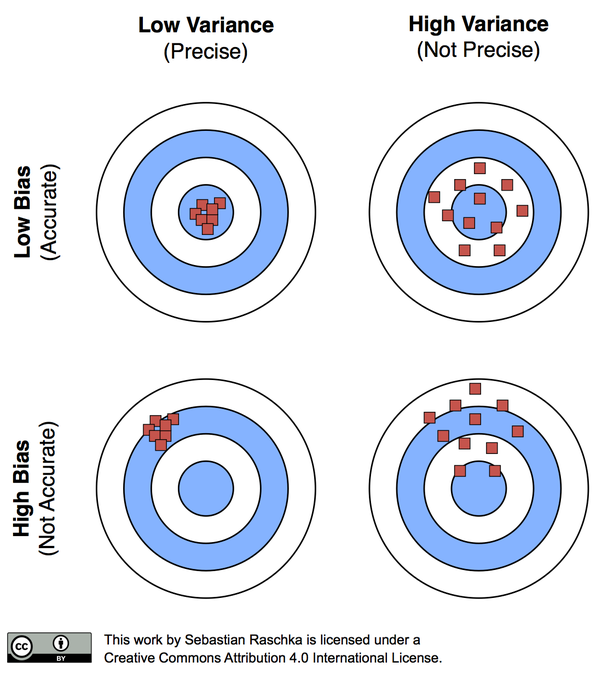)

※ 이미지 출처: https://steemit.com/kr/@doctorbme/doctorbme-essay-bias-variance

### 편향과 분산에 영향을 주는 요소

1. 모델의 복잡도: 단일 측정 요소(estimator)가 출력을 도출하기 위한 요소의 수

> 입력 변수의 수, Parameter의 수, 의사 결정 나무의 노드수, 지지 벡터(Support vector)의 수

**모델의 복잡도를 높힐 수록 편향이 낮아지는 경향이 있고, 분산은 높아지는 경향이 있습니다.**

2. 모델의 측정 요소(estimator)의 수: 모델의 출력을 집계 내기 위해 할당된 측정 요소의 수
    
> Random Forest에서 의사결정나무의 수, 최근접이웃의 수

**모델의 측정 요소를 늘릴 수록 분산은 낮아지는 경향이 있습니다.**

3. 파라메터의 절대 크기(Magnitude)

> 선형 회귀 계수의 크기, 인공 신경망의 가중치 크기

**파라메터의 절대 크기가 클수록 분산이 높아지는 경향이 있습니다.**

## 2. 과적합(Overfitting)과 과소적합(Underfitting)

1. **과적합(Overfitting)**: 모델이 학습데이터에 지나지게 맞추어져서 일반화 성능이 떨어진 상태입니다.

- 분산이 높거나 편향이 낮을 경우에 쉽게 발생합니다.


- 데이터가 지닌 패턴과 모델이 나타내는 패턴의 차이가 클수록 쉽게 발생합니다.

<div style="padding: 5px; margin-left: 20px;">

▷ 모델의 설정을 바꾸어 데이터에 보다 적합한 형태로 바꿉니다.

▷ 모델에 맞게 데이터를 바꿉니다.
    
</div>

- 학습데이터와 평가데이터의 차이가 클 경우 쉽게 발생합니다.

<div style="padding: 5px; margin-left: 20px;">

▷ 속성 공학을 통해 학습데이터와 평가데이터의 패턴을 반영할 수 있는 형태의 변수들을 만들어 줍니다.

</div>
    
- 데이터가 지닌 특성(패턴)을 나타내기에 데이터 수가 충분하지 않을 경우 쉽게 발생합니다.

<div style="padding: 5px; margin-left: 20px;">

▷ 데이터의 수를 늘립니다.

▷ 모델의 복잡도를 낮추어 봅니다.
    
</div>

- 부적절한 입력 변수가 포함이 되어 있을 경우 쉽게 발생합니다.

<div style="padding: 5px; margin-left: 20px;">

▷ 속성 선택을 통해 적절한 변수를 뽑아냅니다.
    
</div>

- 이상치나 노이즈에 의해 데이터에 오염이 심할수록 쉽게 발생합니다.

<div style="padding: 5px; margin-left: 20px;">
    
▷ 전처리 과정을 통해 이상치와 노이즈의 영향을 최소화 합니다.

</div>

2. **과소적합(Underfitting)**: 모델이 학습데이터에 맞추어지지 않아 일반화 성능이 떨어진 상태입니다.

- 분산이 낮거나 편향이 클 경우에 쉽게 발생합니다.


- 모델의 손실을 낮추는 최적화 과정이 제대로 이루어지지 않았을 경우 발생합니다.

<div style="padding: 5px; margin-left: 20px;">

▷ 학습 과정을 추가적으로 진행하여 모델을 좀 더 학습데이터에 맞춥니다.

</div>

- 모델의 복잡도를 높혀 학습 데이터를 좀 더 반영할 수 있도록 합니다.

**[Ex.1]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">

K-최근접 이웃모델의 근접이웃의 수가 많을 수로 편향은 높아지고, 분산은 낮아집니다. 

df_berry 에서 yield를 예측하는 K-최근접 이웃모델의 근접이웃 수에 따른 분산의 변화를 살펴봅니다.
    
전체 데이터를 80% 학습 데이터 df_train, 20%는 평가 데이터 df_test로 나눕니다.
    
이에 따른 학습데이터의 지표와 평가데이터의 지표를 살펴 봅니다.
    
입력 변수는 정규화(Normalization, Min-Max Scaling)를 합니다.

성능 지표는: 평균제곱오차(MSE, Mean Squared Error)를 사용합니다.

</div>

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 80%는 학습 20%는 평가셋으로 나눕니다.
df_train, df_test = train_test_split(df_berry, train_size=0.8, random_state=123)

In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor

# 입력 변수 리스트를 만듭니다.
X_cols = [i for i in df_berry.columns if i != 'yield']
mm_scaler = MinMaxScaler() # MinMax Scaler를 생성합니다.
mm_scaler.fit(df_train[X_cols]) # MinMax Scaler를 학습 데이터로 학습시킵니다.
X_train = mm_scaler.transform(df_train[X_cols]) # 학습 데이터의 입력 변수를 변환하여 X_train 디자인 행렬을 만듭니다.
y_train = df_train['yield']
X_test = mm_scaler.transform(df_test[X_cols]) # 평가 데이터의 입력 변수를 변환하여 X_test 디자인 행렬을 만듭니다.
y_test = df_test['yield']

In [5]:
v = list()
mse_train, mse_test = list(), list()
# 1 ~ 30개(최소 이웃) 까지 반복시킵니다. 
for i in range(1, 31):
    reg_knn = KNeighborsRegressor(n_neighbors=i) # 최소 이웃의 수를 i 설정하여 KNeighborRegressor를 생성합니다.
    reg_knn.fit(X_train, y_train)
    y_train_hat = reg_knn.predict(X_train)
    v.append(np.var(y_train_hat)) # 모델의 학습 데이터에 대한 출력의 분산을 기록합니다.
    mse_train.append(mean_squared_error(y_train, y_train_hat)) # 학습셋에 대한 성능을 기록합니다.
    mse_test.append(mean_squared_error(y_test, reg_knn.predict(X_test))) # 평가셋에 대한 성능을 기록합니다.

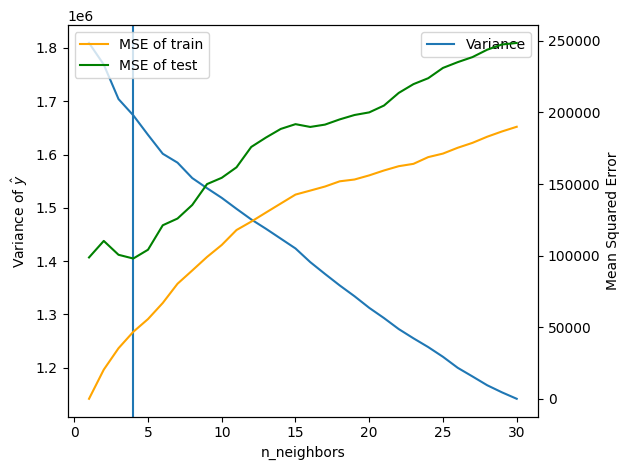

In [6]:
# 모델의 분산, 학습 데이터 성능, 평가 데이터 성능을 직선 그래프로 출력합니다.
plt.plot(np.arange(1, len(v) + 1), v, label='Variance')
plt.gca().set_xlabel('n_neighbors')
plt.gca().set_ylabel('Variance of $\hat{y}$')
plt.legend()
plt.axvline(np.argmin(mse_test) + 1)
tax = plt.gca().twinx()
tax.plot(np.arange(1, len(v) + 1), mse_train, label = 'MSE of train', color='orange')
tax.plot(np.arange(1, len(v) + 1), mse_test, label = 'MSE of test', color='green')
tax.set_ylabel('Mean Squared Error')
plt.legend()
plt.tight_layout()
plt.show()

### 과적합의 진단

검증을 통해서 합니다.

- 학습데이터에 더 맞출수록 검증 데이터에 대한 성능이 떨어지게 되면 과적합이 진행된 것입니다.


**[Ex.2]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">

Ex.1에서 학습 후 평가 이전에 최적합 상태를 보여주는 근접 이웃수를 검증을 통해 찾는 과정을 추가합니다.
    
검증 방법: 5겹 교차검증(5-fold cross validation)
    
</div>

In [7]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate

cv = KFold(n_splits=5, random_state=123, shuffle=True)
def eval_model(reg):
    """
    모델의 성능을 검증합니다. 
    Parameters:
        reg: Regressor
            분류기 인스턴스
    Returns:
        학습 평균, 학습 표준편차, 검증 평균, 검증 표준편차
    """
    result = cross_validate(reg, X_train, y_train, cv=cv, scoring='neg_mean_squared_error', return_train_score=True)
    return -np.mean(result['train_score']), np.std(result['train_score']), -np.mean(result['test_score']), np.std(result['test_score'])

def test_model(reg):
    """
    모델을 평가합니다.
    Parameters:
        reg: Regressor
            분류기 인스턴스
    Returns:
        평가 결과 (Accuracy)
    """
    reg.fit(X_train, y_train)
    return mean_squared_error(y_test, reg.predict(X_test))

In [8]:
reg_knn = KNeighborsRegressor(n_neighbors=1)
eval_model(reg_knn)

(-0.0, 0.0, 93900.00281430126, 19900.482755501595)

In [9]:
mse_train = list()
mse_validate = list()
n_neighbors_list = np.arange(1, 31)
for i in n_neighbors_list:
    reg_knn = KNeighborsRegressor(n_neighbors=i)
    mse_train_, _, mse_validate_, _ = eval_model(reg_knn)
    mse_train.append(mse_train_)
    mse_validate.append(mse_validate_)

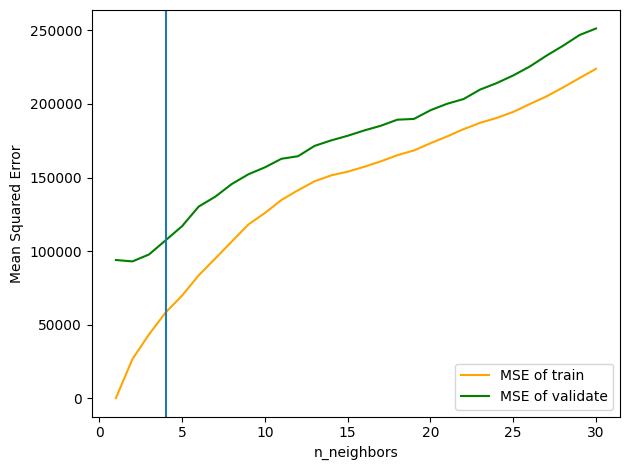

In [10]:
plt.plot(n_neighbors_list, mse_train, label = 'MSE of train', color='orange')
plt.plot(n_neighbors_list, mse_validate, label = 'MSE of validate', color='green')
plt.axvline(np.argmin(mse_test) + 1)
plt.gca().set_xlabel('n_neighbors')
plt.gca().set_ylabel('Mean Squared Error')
plt.legend()
plt.tight_layout()
plt.show()

In [11]:
n_neighbors_list[np.argmin(mse_test)]

4

In [12]:
reg_knn = KNeighborsRegressor(n_neighbors=n_neighbors_list[np.argmin(mse_test)])
test_model(reg_knn)

97959.39558000008

### 모델 검증 결과 분석

- 모델의 개선 방향을 찾기 위해, 모델의 예측 오차의 양상을 살펴보고, 개선 방안을 마련합니다.


**[Ex.3]** 

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">

[Ex.2]의 교차 검증에서의 검증 데이터의 예측 결과의 잔차를 시각화해봅니다.
    
</div>

In [13]:
# 검증 데이터들의 예측 결과를 뽑아 줍니다.
from sklearn.model_selection import cross_val_predict
reg_knn = KNeighborsRegressor(n_neighbors=2)
y_cv = cross_val_predict(reg_knn, X_train, y_train, cv=cv)
resid = y_train - y_cv

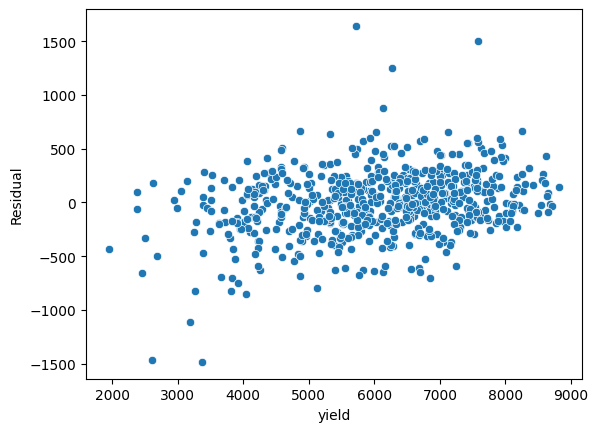

In [14]:
sns.scatterplot(x = y_train, y = resid)
plt.gca().set_ylabel("Residual")
plt.show()

**[Ex.4]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">

fruitset, fruitmass, seed와 잔차와의 관계를 살펴봅니다.
    
</div>

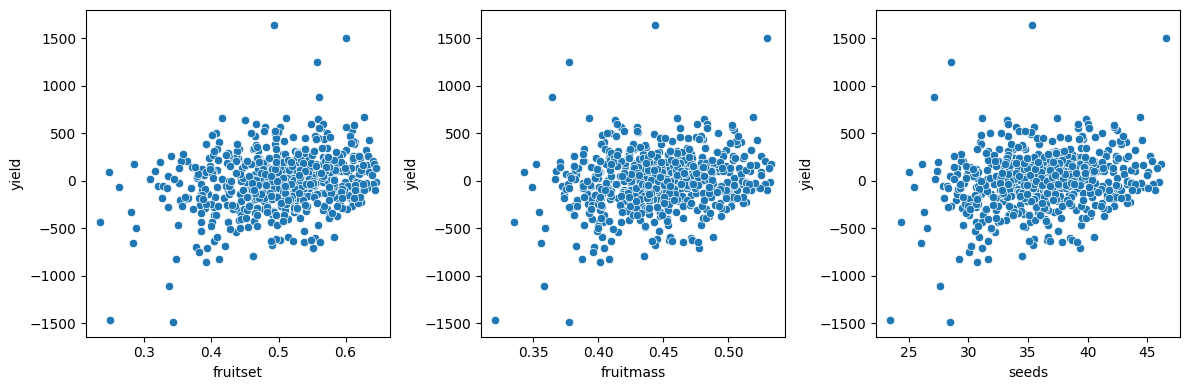

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
for i, ax in zip(['fruitset', 'fruitmass', 'seeds'], axes):
    sns.scatterplot(x = df_train[i], y = resid, ax=ax)
plt.tight_layout()
plt.show()

In [16]:
from scipy.stats import pearsonr
pearsonr(df_train['seeds'], resid)

(0.219095244967785, 3.468394291716062e-08)

**[Ex.5]**

KNN은 데이터의 밀도에 따라 영향도가 있습니다. PCA로 2차원으로 축소해보고 데이터의 밀집도에 따른 성능을 살펴봅니다.

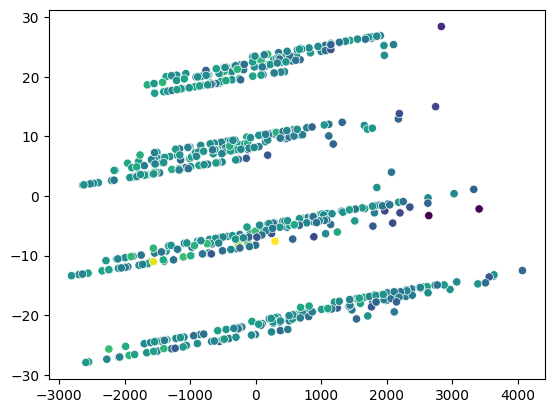

In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_val = pca.fit_transform(df_train)

sns.scatterplot(x=pca_val[:, 0], y = pca_val[:, 1], c=resid)

plt.show()

## 3. 최적 모델 선택

### 하이퍼 파라메터 최적화(Hyper Parameter Optimization)

최적의 성능을 보이는 머신러닝 모델의 설정을 탐색합니다. 

→ 모델이 나타내는 데이터의 형태. Ex) SVM의 Kernel 함수, 인공신경망의 신경망 구성, ...

→ 모델의 복잡도를 탐색. Ex) 의사결정나무의 나무의 최대깊이, 리프노드 수, ...

→ 모델의 파라메터(계수, 가중치, ...)의 절대 크기에 대한 규제(Regularization) 계수

→ ... 

#### Grid Search

여러 하이퍼 파라메터간의 최적의 조합을 찾아내는 방법입니다. 

하이퍼 파라메터 별로 탐색하고자 하는 파라메터를 지정을 하고,

여러 하이퍼 파라메터에서 조합할 수 있는 경우에 대해서 성능을 측정합니다.

**sklearn.model_selection.GridSearchCV**

**주요 하이퍼파라메터**

|이름|설명|
|---|:-----|
|estimators|GridSearch 대상 모델|
|param_grid|탐색할 하이퍼파라메터 셋<br/> 키(Key)는 하이퍼파라미터명 값은 후보 리스트 인 dictionary구조|
|scoring|선택의 기준이 되는 성능 지표|
|cv|검증 방법을 나타내는 Splitter|

**[Ex.6]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">

df_train에서 다음 Random Forest Regressor 하이퍼 파라메터 설정에서 최적의 성능을 보이는 조합을 찾아 봅니다.

```
n_estimators: [30, 50, 70]
max_depth: [7, 8, 9]
min_samples_leaf: [4, 8]
```

검증 방법: 5겹 교차검증(5 fold cross validation)

성능 지표: 평균절대오차(MAE, Mean Absolute Error)
    
</div>

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, KFold

grcv = GridSearchCV(
    estimator = RandomForestRegressor(random_state=123), # 대상 모델의 인스턴스를 생성하여 전달합니다.
    param_grid = {
        'n_estimators': [50, 70, 100],
        'max_depth': [9, 10, 11],
        'min_samples_leaf': [2, 4]
    }, # 대상 하이퍼파라메터를 정의 합니다. key: 하이퍼파라메터명, values: 탐색 후보 리스트
    scoring='neg_mean_absolute_error', # 성능 평가 기준입니다. 
    cv = KFold(n_splits=5, random_state=123, shuffle=True) # 검증 방법 5겹 교차 검증에 따른 Splitter를 전달합니다.
)
grcv.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=123, shuffle=True),
             error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=123,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=No

In [19]:
grcv.best_params_, grcv.best_score_

({'max_depth': 11, 'min_samples_leaf': 2, 'n_estimators': 70},
 -118.68269012690861)

In [20]:
grcv.cv_results_

{'mean_fit_time': array([0.07468801, 0.10140018, 0.14054732, 0.06319413, 0.08825488,
        0.12740722, 0.07319899, 0.10178323, 0.14679523, 0.06474586,
        0.08814745, 0.12802062, 0.07339606, 0.10180464, 0.14382777,
        0.06279988, 0.08838301, 0.12619996]),
 'std_fit_time': array([0.00138132, 0.00258906, 0.00127054, 0.00074966, 0.00081053,
        0.00225344, 0.00040057, 0.00073903, 0.00073963, 0.00065375,
        0.00099415, 0.0012328 , 0.00047167, 0.00117303, 0.00132079,
        0.00132665, 0.00133984, 0.0009798 ]),
 'mean_score_time': array([0.0024087 , 0.00359931, 0.00480747, 0.00240507, 0.00345879,
        0.00459304, 0.00300059, 0.00359941, 0.0051939 , 0.00299873,
        0.00360007, 0.00500007, 0.0027977 , 0.00359635, 0.00500455,
        0.00259895, 0.00320096, 0.00440555]),
 'std_score_time': array([4.86485768e-04, 5.02184593e-04, 4.03891544e-04, 4.85702514e-04,
        5.72505701e-04, 4.97594542e-04, 2.81336348e-05, 4.93810245e-04,
        4.03475231e-04, 1.13443158e-

## 4. 속성 부분집합 선택(Feature Subset Selection)

### 필터(Filter) 방법

입력 변수(속성)와 대상 변수와의 연관성을 측정하고 높은 연관성을 갖는 변수를 우선으로 선택합니다.

대표적인 연관성 지표로 상관도, 정보 이득, 카이제곱 통계량 등이 있습니다.

**sklearn.model_selection.SelectKBest**

**주요 하이퍼파라메터**

|이름|설명|
|---|:-----|
|score_func|입력 변수와 대상 변수의 관련성을 측정해주는 함수<br/>def func_name(X, y):<br/>"""<br/>&nbsp;&nbsp;Parameters:<br/>&nbsp;&nbsp;&nbsp;X: input<br/>&nbsp;&nbsp;&nbsp;&nbsp;y: target<br/>&nbsp;&nbsp;Returns<br/>&nbsp;&nbsp;&nbsp;&nbsp;scores, pvalues</br> pvalues 는 생략 가능합니다.<br/>"""
|k|선택할 속성(입력 변수)의 개수 |


**[Ex.7]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">

X_train과 y_train의 피어슨 상관도를 기준으로 상관도가 높은 입력 변수(속성)을 우선으로 5개에서 16개까지 선택하여 성능을 측정했을 때, 

가장 좋은 성능을 보일 때의 선택한 입력 변수의 수를 구해 봅니다.

max_depth: 11, min_samples_leaf: 2, n_estimators: 70 의 Random Forest Regressor를 사용합니다
    
검증 방법: 5겹 교차 검증(5-fold cross validation)

성능 측정 지표: 평균절대오차(MAE, Mean Absolute Error)
    
</div>

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import make_pipeline
from scipy.stats import pearsonr
from sklearn.model_selection import cross_val_score

def get_corr(X, y):
    """
    입력 변수 X와, 대상 변수 y 간 피어슨 상관도와 pvalue를 환합니다.
    Parameters:
        X: 입력 변수
        y: 대상 변수
    Returns:
        scores(pearson correlation), pvalues
    """
    scores, pvalues = list(), list() 
    for i in range(X.shape[1]):
        r = pearsonr(X[:, i], y)
        scores.append(abs(r[0]))
        pvalues.append(r[1])
    return scores, pvalues

cv = KFold(n_splits=5, random_state=123, shuffle=True)
cv_scores = list()
for i in range(5, 17):
    reg_rf_kbest = make_pipeline(
        SelectKBest(get_corr, k=i),
        RandomForestRegressor(max_depth=11, min_samples_leaf=2, n_estimators=70)
    )
    cv_scores.append(
        -np.mean(cross_val_score(reg_rf_kbest, X_train, y_train, cv=cv, scoring='neg_mean_absolute_error'))
    )

In [22]:
cv_scores

[133.1676834408625,
 126.99623421028741,
 124.86421778483232,
 123.33169336637675,
 121.02330785704658,
 119.02449056202549,
 118.76883285997876,
 120.89296722137848,
 120.3552942437183,
 120.76634299800472,
 118.74728727561774,
 118.38038673430944]

### 웨퍼(Wrapper)방법

사용할 모델에 선택한 변수로 검증을 하여 가장 좋은 성능을 내는 변수 조합을 찾습니다.

예시를 위해 입력 변수의 수가 적은 sklearn에 내장된 **Iris** 데이터셋을 불러 옵니다. 

80%는 학습데이터(X_iris_train, y_iris_train)로, 20%(X_iris_test, y_iris_test)로 나누어 봅니다.

이 때, 계층적 선택법을 사용합니다.

In [23]:
from sklearn.datasets import load_iris

iris = load_iris()
X_iris = iris['data']
y_iris = iris['target']

X_iris_train, X_iris_test, y_iris_train, y_iris_test = train_test_split(X_iris, y_iris, train_size=0.8, stratify=y_iris)

In [24]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

#### All Subsets

입력 변수에서 조합할 수 있는 모든 변수의 조합을 사용합니다.

※ 시간 복잡가 $O(n!)$ (n은 입력 변수의 수)이므로 입력 변수가 많아 질수록, 수행 속도가 급격하게 증가합니다.

**[Ex.8]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">

학습 데이터 {X_iris_train, y_iris_train} 에서 최적의 입력 변수 조합을 All Subsets 방법으로 찾아 봅니다.

성능 지표는 정확도(Accuracy)입니다. Wrapper는 로지스틱 회귀모델을 사용합니다.

찾은 변수 조합으로 평가 데이터 {X_iris_test, Y_iris_test}의 성능을 측정 합니다.
    
</div>

In [25]:
from itertools import combinations
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline 
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score

cv = StratifiedKFold(n_splits=5, random_state=123, shuffle=True)
scores = list()
subsets = list()
clf_lr = make_pipeline(StandardScaler(), LogisticRegression(solver='lbfgs', multi_class='multinomial'))
for i in range(1, 5):
    for j in combinations(np.arange(0, 4), i):
        X_cols = j
        subsets.append(j)
        scores_ = cross_val_score(
            clf_lr,
            X_iris_train[:, j],
            y_iris_train,
            scoring = 'accuracy',
            cv = cv
        )
        scores.append(np.mean(scores_))

In [26]:
best_idx = np.argmax(scores)
best_features = subsets[best_idx]
scores[best_idx], best_features, [iris['feature_names'][i] for i in best_features]

(0.9583333333333334, (3,), ['petal width (cm)'])

In [27]:
clf_lr.fit(X_iris_train[:, best_features], y_iris_train)
accuracy_score(y_iris_test, clf_lr.predict(X_iris_test[:, best_features]))

0.9666666666666667

#### 전진선택법(Forward Selection)과 후진제거법(Backward Elimination)

* 연산 정의

1. 전진 선택: 선택하지 않은 속성들을 하나 씩 추가 해봤을 때 가장 좋은 성능을 보인 속성을 선택합니다. 


2. 후진 제거: 선택한 속성들을 하나 씩 제거해 봤을 때 가장 좋은 성능을 보인 속성을 제거합니다.

----------------------

* 선택법

1. 전진선택법(Forward Selection)

<div style="padding: 5px; margin-left: 20px;">

- 빈리스트에서 시작하여, 단계적으로 전진 선택을 합니다.

    
- 더이상 성능에 개선이 없거나 선택할 속성이 없다면 멈춥니다.
    
</div>

2. 단계적 전진선택법(Stepwise Forward Selection)

<div style="padding: 5px; margin-left: 20px;">

- 빈리스트에서 시작하여, 단계적으로 전진 선택을 하고, 후진 제거를 하여 성능에 개선이 있다면 제거를 합니다.

    
- 더이상 성능에 개선이 없거나 선택할 속성이 없다면 멈춥니다.
    
</div>

3. 후진제거법(Backward Elimination)

<div style="padding: 5px; margin-left: 20px;">

-  모든 속성 리스트에서 시작하여, 단계적으로 후진 제거를 합니다.

    
- 더이상 성능에 개선이 없거나 제거할 속성이 없다면 멈춥니다.
    
</div>

4. 단계적 후진제거법(Stepwise Backward Elimination)

<div style="padding: 5px; margin-left: 20px;">

- 모든 속성 리스트에서 시작하여, 단계적으로 후진 제거를 하고, 전진 선택을 하여 성능에 개선이 있다면 추가 합니다.

    
- 더이상 성능에 개선이 없거나 제거할 속성이 없다면 멈춥니다.
    
</div>

**[Ex.9]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">

[Ex.8]에서 All Subsets 예제에서 All Subsets 대신 전진선택법, 단계적 전진선택법, 후진제거법, 단계적후진제거법을 수행해봅니다.
    
</div>

In [28]:
from itertools import combinations

clf_lr = make_pipeline(StandardScaler(), LogisticRegression(solver='lbfgs', multi_class='multinomial'))

def eval_subsets(subsets):
    """
    변수셋의 성능을 평가합니다.
    Parameters:
        subsets: list
            입력 변수 리스트
    Returns
        accuracy
    """
    return np.mean(
        cross_val_score(clf_lr, X_iris_train[:, subsets], y_iris_train, scoring='accuracy', cv=cv)
    )
def forward_select(X_all, X_subsets):
    """
    전진 선택 연산
    Parameters:
        X_all: list
            모든 입력 변수 리스트
        X_subsets: list
            선택된 입력 변수 리스트
    Returns
        str, float
        선택된 변수명, 성능
    """
    X_fwd = [X_subsets + [i] for i in X_all if i not in X_subsets]
    scores = list()
    for i in X_fwd:
        scores.append(eval_subsets(i))
    idx = np.argmax(scores)
    return X_fwd[idx], scores[idx]

def backward_eliminate(X_subsets):
    """
    후진 제거 연산
    Parameters:
        X_subsets: list
            선택된 입력 변수 리스트
    Returns
        str, float
        선택된 변수명, 성능
    """
    if len(X_subsets) < 2:
        return [], -np.inf
    scores = list()
    X_bwd = [list(i) for i in combinations(X_subsets, len(X_subsets) - 1)]
    for i in X_bwd:
        scores.append(eval_subsets(i))
    idx = np.argmax(scores)
    return X_bwd[idx], scores[idx]

In [29]:
# 전진선택법을 해봅니다.
X_subsets = [[]] # 각 단계에 선택된 속성들을 남기기 위한 리스트 입니다.
scores = [-np.inf]
X_all = np.arange(0, 4)

while True:
    X_best, score = forward_select(X_all, X_subsets[-1])
    print(X_best, score) # 현 단계에서 가장 좋은 속성 조합을 출력합니다.
    if score < scores[-1]: # 성능에 개선이 없으면 종료합니다.
        break
    scores.append(score)
    X_subsets.append(X_best)
    if len(X_subsets) == len(X_all): # 모두 선택되어 더 이상 선택할 변수가 없을 경우 종료합니다.
        break
     
scores[-1], X_subsets[-1], [iris['feature_names'][i] for i in X_subsets[-1]]

[3] 0.9583333333333334
[3, 0] 0.95


(0.9583333333333334, [3], ['petal width (cm)'])

In [30]:
# 후진제거법을 해봅니다.
X_all = np.arange(0, 4)
X_subsets = [X_all]
scores = [eval_subsets(X_all)]

while True:
    X_best, score = backward_eliminate(X_subsets[-1])
    print(X_best, score)
    if score < scores[-1]:
        break
    scores.append(score)
    X_subsets.append(X_best)
    if len(X_subsets) == 1: # 더 이상 제외할 변수가 없으면 종료합니다.
        break
scores[-1], X_subsets[-1], [iris['feature_names'][i] for i in X_subsets[-1]]

[0, 1, 3] 0.9583333333333334
[0, 3] 0.95


(0.9583333333333334,
 [0, 1, 3],
 ['sepal length (cm)', 'sepal width (cm)', 'petal width (cm)'])

In [31]:
# 단계적 전진선택법
X_subsets = [[]]
scores = [-np.inf]
X_all = np.arange(0, 4)

while True:
    clf_lr = make_pipeline(StandardScaler(), LogisticRegression(solver='lbfgs', multi_class='multinomial'))
    X_best, score = forward_select(X_all, X_subsets[-1])
    print(X_best, score)
    
    if score < scores[-1]:
        break
    
    X_bwd, bwd_score = backward_eliminate(X_best) # 후진 제거를 합니다.
    if score < bwd_score: # 후진 제거의 효과가 있다면 제거한 리스트를 선택합니다.
        X_best = X_bwd
        score = bwd_score
        print("B.E.: {} {}".format(bwd_score, X_bwd))
    
    scores.append(score)
    X_subsets.append(X_best)
    if len(scores) == len(X_all) + 1:
        break
        
scores[-1], X_subsets[-1], [iris['feature_names'][i] for i in X_subsets[-1]]

[3] 0.9583333333333334
[3, 0] 0.95


(0.9583333333333334, [3], ['petal width (cm)'])

In [32]:
# 단계적 후진제거법
X_all = np.arange(0, 4)
X_subsets = [X_all]
scores = [eval_subsets(X_all)]

while True:
    X_best, score = backward_eliminate(X_subsets[-1])
    print(X_best, score)
    
    if score < scores[-1]:
        break
    
    X_fwd, fwd_score = forward_select(X_all, X_best)
    if score < fwd_score: # 전진 선택의 효과가 있다면 전진 선택한 리스트를 선택합니다.
        X_best = X_fwd
        score = fwd_score
        print("F.S.: {} {}".format(fwd_score, X_fwd))
    
    scores.append(score)
    X_subsets.append(X_best)
    if len(scores) == len(X_all) + 1:
        break
scores[-1], X_subsets[-1], [iris['feature_names'][i] for i in X_subsets[-1]]

[0, 1, 3] 0.9583333333333334
[0, 3] 0.95


(0.9583333333333334,
 [0, 1, 3],
 ['sepal length (cm)', 'sepal width (cm)', 'petal width (cm)'])

**mlxtend.feature_selection.SequentialFeatureSelector**

(단계적)전진 선택법과 후진 제거법을 제공합니다.

**주요 하이퍼파라메터**

|이름|설명|
|---|:-----|
|estimators|기반 모델|
|k_features|선택할 입력 변수(속성)의 수<br/> 'best': 설정시 가장 좋은 성능을 나타낸 변수 만큼 뽑습니다.|
|forward|True: 전진 선택법<br/> 후진 선택법|
|floating|단계적 수행 여부|
|scoring|선택의 기준이 되는 성능 지표|
|cv|검증 방법을 나타내는 Splitter|

**[Ex. 10]** 

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">

mlxtend.feature_selection.SequentialFeatureSelector를 이용하여 {X_iris_train, y_iris_train} 데이터셋을 이용에서 단계적 전진선택법을 이용한 속성 선택을 합니다.

성능 지표는 정확도(Accuracy)입니다.
    
</div>

In [33]:
from mlxtend.feature_selection import SequentialFeatureSelector

# 단계적 전진선택법을 수행하도록 SequentialFeatureSelector를 설정합니다.
sfs = SequentialFeatureSelector(
    make_pipeline(StandardScaler(), LogisticRegression(solver='lbfgs', multi_class='multinomial')), # 기반 모델을 설정해줍니다.
    k_features='best',
    forward=True,
    floating=True,
    scoring='accuracy',
    cv=cv
)
sfs.fit(X_iris_train, y_iris_train)
sfs.k_feature_idx_, sfs.k_score_

c:\users\user\python3.7\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


((3,), 0.9583333333333334)

In [35]:
X_all = np.arange(0, 4)
subsets = [X_all]
scores = [eval_subsets(X_all)]

for i in range(len(X_all) - 1):
    subset = subsets[-1]
    clf_lr.fit(X_iris_train[:, subset], y_iris_train)
    worst_idx = np.argmin(np.mean(np.abs(clf_lr[1].coef_), axis=0))
    subset = [i for i in subset if i != subset[worst_idx]]
    score = eval_subsets(subset)
    print(subset, score)
    if score >= scores[-1]:
        scores.append(score)
        subsets.append(subset)
    else:
        break
subsets[-1], scores[-1]

[1, 2, 3] 0.9583333333333334
[2, 3] 0.95


([1, 2, 3], 0.9583333333333334)

### 장단점 비교 

|방법|장점|단점|
|---|:----|:----|
|Filter 방법|계산 비용이 낮고 빠릅니다. <br/>대규모 데이터셋에도 적용하기 쉽습니다.<br/>머신러닝 모델과 독립적으로 작동하므로 어떤 모델이든 적용 가능합니다.|모델의 상호작용을 고려하지 않고 속성을 개별적으로 평가하기 때문에, <br/> 최적의 조합을 고려하지 않을 수 있습니다.|
|Wrapper 방법|속성 간 상호작용을 고려할 수 있어 더 좋은 성능을 얻을 수 있습니다.|계산 비용이 매우 높습니다.|